# Gathering data

We need to import our libraries first

In [1]:
#Import our libraries
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now we start gathering the data

In [2]:
#Read the csv file and put it in a df
enhanced_df =pd.read_csv('twitter-archive-enhanced.csv')
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
#Get the imiges file and load it it into a data frame
rqst =requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('images.tsv', mode ='wb') as file:
    file.write(rqst.content)
images_df = pd.read_csv('images.tsv', sep='\t')
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


The twitterapi.py file

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = enhanced_df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#Load the data from the json file then make the needed data into a data frame
with open('tweet-json.txt') as json_file:
    raw_data =json_file.read().splitlines()
rowslist=[]
for i in raw_data:
    tempjson =json.loads(i)
    templist =[tempjson['id'], tempjson['retweet_count'], tempjson['favorite_count']]
    rowslist.append(templist)
#Creating the DataFrame, it'll hold the data we filtered
twitter_data =df =pd.DataFrame(rowslist)
#Labeling columns
twitter_data.columns =['tweet_id', 'retweet_count', 'favorite_count']
twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Assessing data

## Quality issues

1. In the main data frame: Nondescriptive column: We will replace the links in the source column with the actual app they tweeted with in words since it's nicer this way.
2. In the main data frame: Convert the timestamp column to a daytime object
3. In the main data frame: Change rating_numerator to 13 if it was more than 13
4. In the main data frame: Change the rating_denominator to 10 if it was more than 10
5. In the main data frame: Remove all retweets
6. In the main data frame: Remove all tweets that are replys
7. In the twitter_data data frame: Rename favorite_count to likes_count, because twittter has changed that awhile back.
8. In the images data frame: Nondescriptive column headers: We will change the column headers for p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog to names that are more descriptive.

## tidiness issues

1. In the main data frame: Combine the columns dogo, floofer, pupper, puppo into one column named dog_type
2. Join the tweet_data and the main data frame (enhanced_df) together.

# Data cleaning

# Copying the datasets

We will have to copy the datasets before cleaning

In [5]:
enhanced_copy =enhanced_df.copy()
twitter_data_copy =twitter_data.copy()
images_copy =images_df.copy()

## Quality issues

### Source issue

Define:
The source column has what I think is an html tag containing the link for the app that's used for sending the tweets. We'll replace it with an easy name to read.

In [6]:
enhanced_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Code:

In [7]:
#Replace html text in source column
enhanced_df =enhanced_df.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone', '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}, regex =False)

Test:

In [8]:
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### The timestamp issue

Define:
We will convert the timestamp column to a datetime object so we can manage the time if need be

Check the data type of the timestamp column

In [9]:
enhanced_df['timestamp'].dtypes

dtype('O')

Code:

In [10]:
#Convert timestamp column to object
enhanced_df['timestamp'] = pd.to_datetime(enhanced_df['timestamp'])

Test:

In [11]:
#check again
enhanced_df['timestamp'].dtypes

datetime64[ns, UTC]

## rating_numerator issue

Define:
We will change the rating_numerator to 13 if it was more than 13

In [12]:
#Check value counts of rating_numerator
enhanced_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Code:
[source for the cell below](https://stackoverflow.com/questions/21608228/conditional-replace-pandas)

In [13]:
#Lets fix that
enhanced_df['rating_numerator'] = np.where(enhanced_df['rating_numerator'] > 13, 13, enhanced_df['rating_numerator'])

test:

In [14]:
enhanced_df['rating_numerator'].value_counts()

12    558
11    464
10    461
13    433
9     158
8     102
7      55
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

### rating_denumerator issue

Define:
We will change the rating_denumerator to 10 if it was more than 10

Code:

In [15]:
#Check max value of rating_denominator
enhanced_df['rating_denominator'].max()

170

Code:

In [16]:
#Lets fix that
enhanced_df['rating_denominator'] = np.where(enhanced_df['rating_denominator'] > 10, 10, enhanced_df['rating_denominator'])
enhanced_df['rating_denominator'] = np.where(enhanced_df['rating_denominator'] < 10, 10, enhanced_df['rating_denominator'])

Test:

In [17]:
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Replies issue

Define:
There are a lot  of replies that this user has sent, we don't need them so we will remove them.

Code:
[Source for the cell below](https://www.delftstack.com/howto/python-pandas/how-to-delete-dataframe-row-in-pandas-based-on-column-value/)

In [18]:
#We'll remove all the replies
reply_ids = enhanced_df[enhanced_df['in_reply_to_status_id'] >0 ].index
enhanced_df.drop(reply_ids , inplace=True)

Test:

In [19]:
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Retweets issue

Define:
There are a lot of entries that are just retweets, we don't need them

Code:
[Source for the cell below](https://www.delftstack.com/howto/python-pandas/how-to-delete-dataframe-row-in-pandas-based-on-column-value/)

In [20]:
#We'll remove all the retweets
retweet_ids = enhanced_df[enhanced_df['retweeted_status_id'] >0 ].index
enhanced_df.drop(retweet_ids , inplace=True)

Test:

In [21]:
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Column name issue in the twitter_data data frame

Define:
Here we'll rename the favorite_count to likes_count in the twitter_data data frame

In [22]:
#Check the column names
twitter_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

Code:

In [23]:
#Lets change the name of favorite_count to likes_count
twitter_data =twitter_data.rename(columns ={'favorite_count': 'likes_count'})

Test:

In [24]:
twitter_data

,tweet_id,retweet_count,likes_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Column names issue in the images data frame

Define:
Here we'll change some column names to more descriptive names in the images data frame

In [25]:
#Check the column names
images_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Code:

In [26]:
#Names change
images_df =images_df.rename(columns ={'p1': 'prediction1', 'p1_conf': 'prediction1_confidence', 'p1_dog': 'prediction1_dog', 'p2': 'prediction2', 'p2_conf': 'prediction2_confidence', 'p2_dog': 'prediction2_dog', 'p3': 'prediction3', 'p3_conf': 'prediction3_confidence', 'p3_dog': 'prediction3_dog'})

Test:

In [27]:
images_df

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Tidiness issues

### Combining columns

Define:
We will combine the 4 dog stages columns into one

Code:

In [28]:
#We first replace the empty values with None
enhanced_df[['doggo', 'floofer', 'pupper', 'puppo']] = enhanced_df[['doggo', 'floofer', 'pupper', 'puppo']].replace({'None': ''})
#We'll join the 4 columns into one
enhanced_df['dog_stage'] = enhanced_df['doggo'] + enhanced_df['floofer'] + enhanced_df['pupper'] + enhanced_df['puppo']
enhanced_df = enhanced_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
enhanced_df['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

We can see that sometimes we get dogs that are more than one type. Lets fix that

In [29]:
enhanced_df.dog_stage = enhanced_df.dog_stage.replace('doggopupper', 'multiple')
enhanced_df.dog_stage = enhanced_df.dog_stage.replace('doggopuppo', 'multiple')
enhanced_df.dog_stage = enhanced_df.dog_stage.replace('doggofloofer', 'multiple')

Test:

In [30]:
#Lets check again
enhanced_df['dog_stage'].value_counts()

            1761
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_stage, dtype: int64

### Joining the enhanced_df data frame with twitter_data data frame

Define:
We will join the twitter_data data frame with the main enhanced_df data frame

Code:

In [31]:
combined_data = pd.merge(enhanced_df, twitter_data, on = 'tweet_id', how = 'inner')

In [32]:
# Test:
combined_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,likes_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,,41,111
2093,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,,147,311
2094,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,,47,128
2095,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,,48,132


# Saving datasets

In [33]:
#save datasets
combined_data.to_csv('twitter_archive_master.csv')
images_df.to_csv('images_master.csv')

# Analysis

We'll be answering the following questions
1. What are the dogs who got the most likes? and what are their ratings?
2. What's the most common dog stage?
3. What's the most common dog name?
4. What's the most app the account used to send their tweets from?

## What are the dogs who got the most likes? and what are their ratings?

Lets say we just want to look at the top 5 dogs who got the most likes here

In [34]:
#Top 5 most liked dogs
combined_data.sort_values(['likes_count'], ascending=[False])[['name', 'rating_numerator', 'rating_denominator', 'dog_stage', 'likes_count']].head()

,name,rating_numerator,rating_denominator,dog_stage,likes_count
325,None,13,10,puppo,132810
825,None,13,10,doggo,131075
60,Duddles,13,10,,107956
419,Stephan,13,10,,107015
115,Jamesy,13,10,pupper,106827


## What's the most common dog stage?

In [35]:
#Most common dog stage
combined_data['dog_stage'].value_counts()

            1761
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_stage, dtype: int64

We can see that from the stages the algorithm was able to identify, pupper       was the most common stage with 221 entries. Unfortunatly though, it wasn't able to identify 1761 entries though.

## What are the dogs who got the most retweets?

Retweets are a form of liking a tweet, or at least agreeing with its content. Lets look at the most dogs who got retweets

In [36]:
#The top 5 retweeted tweets
combined_data.sort_values(['retweet_count'], ascending=[False])[['name', 'rating_numerator', 'rating_denominator', 'dog_stage', 'retweet_count']].head()

,name,rating_numerator,rating_denominator,dog_stage,retweet_count
825,None,13,10,doggo,79515
419,Stephan,13,10,,56625
864,None,13,10,doggo,52360
325,None,13,10,puppo,48265
60,Duddles,13,10,,45849


## What are the most app they use for their tweets?

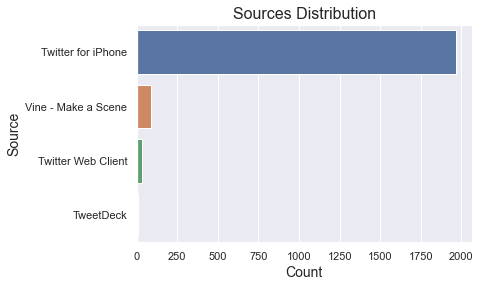

In [37]:
combined_data['source'].value_counts()
sns.set(style="darkgrid")
sns.countplot(data =combined_data, y ='source', order =combined_data['source'].value_counts().index)
plt.xticks(rotation =360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('Sources Distribution',fontsize=16)
plt.show();

We can see that twitter for iphone is the most app used, while tweet desk is the  least common one.